# Assignment 9
# Artificial Neural Networks (ANN) to predict car purchases


Submitted by,

**Ben Abraham Biju**

**22IM10048**

## 1. Import Libraries and Load Data

We import all the necessary libraries and load the dataset.

In [43]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf


In [44]:
np.random.seed(22)
tf.random.set_seed(22)

In [45]:
dataset = pd.read_csv('Practice_car_Data.csv')

# Display first few rows of the dataset
dataset.head()


,Car ID,Estimated Cost,Mileage(kmpl),Engine(CC),Purchased
0,15624510,19000,26.60,998.0,0
1,15810944,20000,19.67,1582.0,0
2,15668575,43000,18.20,1199.0,0
3,15603246,57000,20.77,1248.0,0
4,15804002,76000,15.20,1968.0,0


In [46]:
print("\nDataset info:")
dataset.info()



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Car ID          400 non-null    int64  
 1   Estimated Cost  400 non-null    int64  
 2   Mileage(kmpl)   400 non-null    float64
 3   Engine(CC)      400 non-null    float64
 4   Purchased       400 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 15.8 KB


In [47]:
# Check for missing values
print("\nMissing values in each column:")
dataset.isnull().sum()


Missing values in each column:


,0
Car ID,0
Estimated Cost,0
Mileage(kmpl),0
Engine(CC),0
Purchased,0


## 2. Feature Selection and Data Splitting

The features : ***Estimated Cost, Mileage(kmpl), Engine(CC)*** , are selcted as the input variables.

Set ***Purchased*** as our target variable for binary classification.


In [48]:
# Preprocessing: Select features and target variable
X = dataset[['Estimated Cost', 'Mileage(kmpl)', 'Engine(CC)']]
y = dataset['Purchased']

Split the data into three sets:

* Training set (70% of data): Used to train the model
* Validation set (15% of data): Used to tune hyperparameters and prevent overfitting
* Test set (15% of data): Used for final evaluation



In [49]:

# Split the data into training (70%), validation (15%), and test sets (15%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)  # 0.1765 of 85% is ~15% of total

print(f"\nTraining set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")



Training set shape: (279, 3)
Validation set shape: (61, 3)
Test set shape: (60, 3)


Apply feature scaling using StandardScaler to normalize our features, so that no feature becomes exceptionally dominant while fiting the model.

In [50]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## 3. ANN Model Architecture

The model architecture includes:

- Input layer with 16 neurons and ReLU activation, followed by 20% dropout to prevent overfitting
- Hidden layer with 8 neurons and ReLU activation, followed by 20% dropout
- Output layer with a single neuron and sigmoid activation function, which is appropriate for binary classification as it outputs a probability between 0 and 1


In [51]:
# Build the ANN model
model = Sequential()

# Input layer
model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))

# Hidden layer 1
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The model summary shows the total number of trainable parameters

In [52]:
print("\nModel Architecture:")
model.summary()


Model Architecture:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 16)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

## 4. Compile and Train the Model

We compile the model with:

- Adam optimizer: An adaptive learning rate optimization algorithm
Binary cross-entropy loss function: Appropriate for binary classification problems
- Accuracy as our evaluation metric


In [53]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



Set up early stopping to prevent overfitting:

- Monitors validation loss
- Has a patience of 10 epochs (stops training if validation loss doesn't improve for 10 consecutive epochs)
- Restores the best weights after training


In [54]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


Train the model:

- Maximum of 100 epochs
- Batch size of 32 samples
- Training set for learning
- Validation set for monitoring performance

In [55]:
# Train the model
epochs = 100
batch_size = 32

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.4497 - loss: 0.7611 - val_accuracy: 0.5902 - val_loss: 0.7211
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5195 - loss: 0.7295 - val_accuracy: 0.6066 - val_loss: 0.7032
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5210 - loss: 0.7169 - val_accuracy: 0.5738 - val_loss: 0.6881
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5724 - loss: 0.6948 - val_accuracy: 0.5738 - val_loss: 0.6751
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5944 - loss: 0.6929 - val_accuracy: 0.6066 - val_loss: 0.6637
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5953 - loss: 0.6666 - val_accuracy: 0.5902 - val_loss: 0.6549
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6459 - loss: 0.6659 - val_accuracy: 0.6230 - val_loss: 0.6480
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6155 - loss: 0.6612 - val_accuracy: 0.6230 - val_loss:

## 5. Visualize Training and Validation Performance

- The training accuracy and training loss are plotted for the duration of training.
- There are two graphs, one for validation set and the other for tranining set in each plot


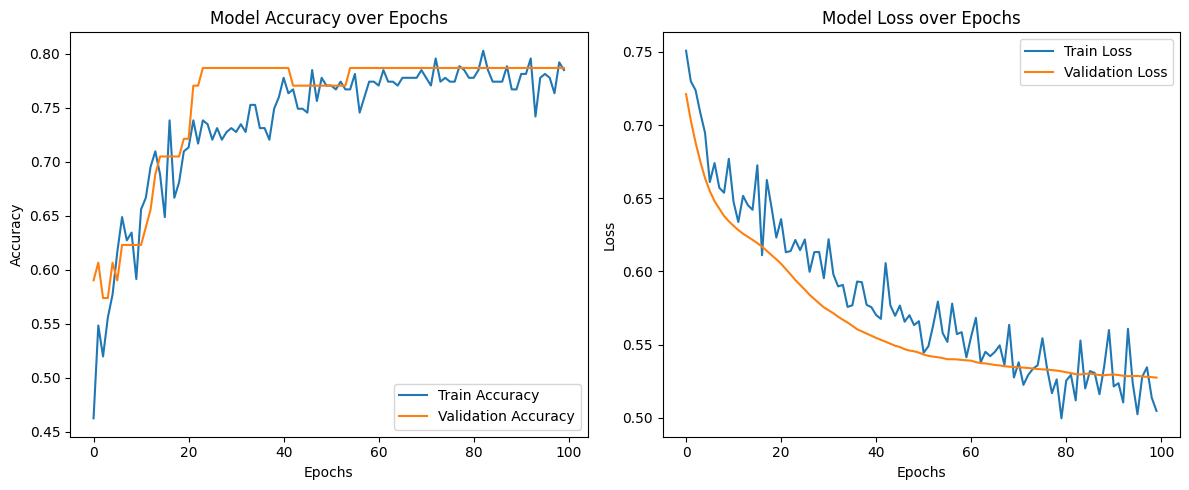

In [56]:
# Plot training & validation metrics
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 6. Evaluate Model Performance on Test Set
We evaluate our trained model on the unseen test data:

- We use the evaluate method to calculate the loss and accuracy on the test set
- We use the model to make predictions on the test set:

To predict using the model, we first calculate the probability given as the output of the model. Then, we convert these probabilities to binary predictions (0 or 1) using a threshold of 0.5


In [57]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)


Test Loss: 0.5832
Test Accuracy: 0.7667
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


The model has an accuracy of **76.67%** which is above the required benchmark of 75%.

## 7. Classification Report and Confusion Matrix

Confusion Matrix:

- Visualizes the model's predictions versus actual values
- Shows true positives, false positives, true negatives, and false negatives
- Helps understand where the model is making mistakes



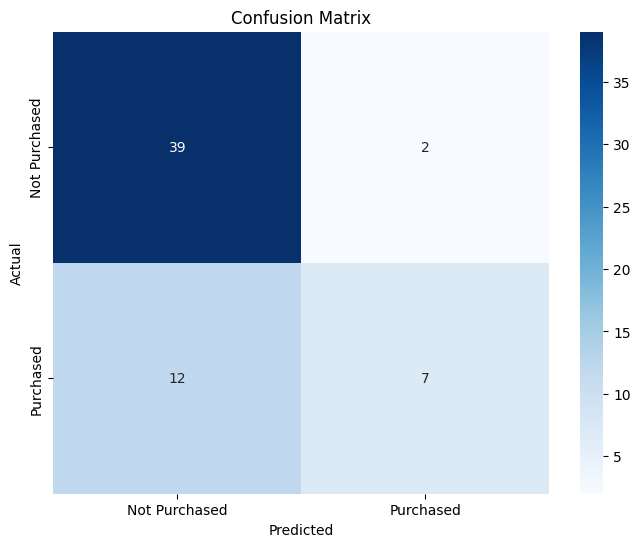

In [58]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Purchased', 'Purchased'],
            yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Classification Report:

- Precision: The ratio of correctly predicted positive observations to the total predicted positives
- Recall: The ratio of correctly predicted positive observations to all actual positives
- F1-score: The weighted average of Precision and Recall
Support: The number of actual occurrences of each class


In [59]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.95      0.85        41
           1       0.78      0.37      0.50        19

    accuracy                           0.77        60
   macro avg       0.77      0.66      0.67        60
weighted avg       0.77      0.77      0.74        60



Overall Accuracy

In [60]:
print("\nAccuracy on Test Set:", accuracy_score(y_test, y_pred))


Accuracy on Test Set: 0.7666666666666667


## **Results**

## **Accuracy**: 76.67%





## Conclusion

The neural network architecture we have used consists of:

- Input layer: 16 neurons with ReLU activation
- Hidden layer: 8 neurons with ReLU activation
- Output layer: 1 neuron with sigmoid activation
- Dropout layers (20%) to prevent overfitting


The following can de deduced form the results:

- High Precision for Class 1: The model is reliable when it predicts a customer will purchase a car (78% precision).
- High Recall for Class 0: The model correctly identifies 95% of customers who will not purchase a car.
- Overall Accuracy: 76.67% accuracy is reasonably good for this binary classification task.


### Model architecture visualization

I have attempted to draw the model architecture showing the different neurons and their connections using matplotlib

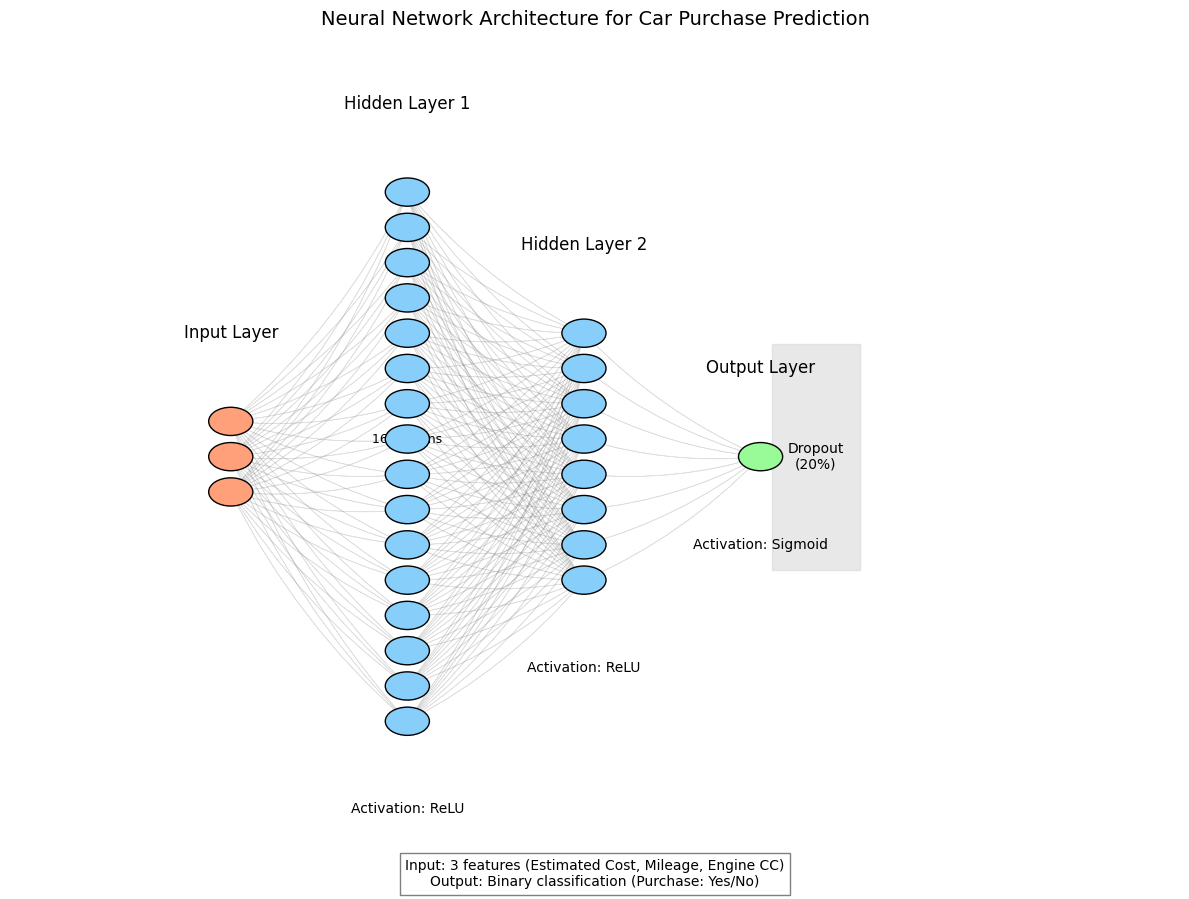

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle, FancyArrowPatch
from matplotlib.patches import Circle

def plot_neural_network(layer_sizes):


    fig = plt.figure(figsize=(12, 9))
    ax = fig.gca()
    ax.axis('off')

    # Colors
    input_color = '#FFA07A'
    hidden_color = '#87CEFA'
    output_color = '#98FB98'
    text_color = '#000000'
    dropout_color = '#D3D3D3' #

    # Spacing parameters
    n_layers = len(layer_sizes)
    v_spacing = 0.25
    h_spacing = 0.8


    has_dropout = [True, True, False]


    layer_centers = []
    effective_layers = n_layers + sum(has_dropout)
    for i in range(effective_layers):
        if i < n_layers:
            layer_centers.append((i * h_spacing + 0.5, 0))
        else:

            dropout_idx = i - n_layers
            count_prev_dropouts = sum(has_dropout[:dropout_idx])
            layer_idx = dropout_idx + count_prev_dropouts
            layer_centers.append(((layer_idx + 0.5) * h_spacing + 0.25, 0))

    # Draw neurons for each layer
    layer_neuron_positions = []
    current_layer_idx = 0
    dropout_count = 0

    for i in range(effective_layers):
        if i < n_layers:

            layer_size = layer_sizes[i]
            color = input_color if i == 0 else output_color if i == n_layers - 1 else hidden_color
            layer_name = "Input Layer" if i == 0 else "Output Layer" if i == n_layers - 1 else f"Hidden Layer {i}"

            plt.text(layer_centers[i][0], layer_sizes[i] * v_spacing / 2 + 0.5, layer_name,
                    fontsize=12, ha='center', va='center')


            if i > 0:
                activation = "ReLU" if i < n_layers - 1 else "Sigmoid"
                plt.text(layer_centers[i][0], -layer_sizes[i] * v_spacing / 2 - 0.5, f"Activation: {activation}",
                        fontsize=10, ha='center', va='center')


            neuron_positions = []


            for j in range(layer_size):
                x = layer_centers[i][0]
                y = j * v_spacing - (layer_size - 1) * v_spacing / 2

                circle = Circle((x, y), 0.1, color=color, ec='black', zorder=4)
                ax.add_patch(circle)
                neuron_positions.append((x, y))


                if layer_size > 10 and j == int(layer_size / 2):
                    plt.text(x, y, f"{layer_size} neurons",
                            fontsize=9, ha='center', va='center')

            layer_neuron_positions.append(neuron_positions)
            current_layer_idx = i + 1

        else:
            # This is a dropout layer after a regular layer
            layer_idx = i - n_layers + dropout_count

            if has_dropout[layer_idx]:
                # Draw dropout layer
                x = layer_centers[current_layer_idx - 1][0] + 0.25
                y = 0
                rect = Rectangle((x - 0.2, -0.8), 0.4, 1.6, color=dropout_color, alpha=0.5, zorder=2)
                ax.add_patch(rect)
                plt.text(x, y, "Dropout\n(20%)", fontsize=10, ha='center', va='center')
                dropout_count += 1
                current_layer_idx += 1

    # Connect neurons between adjacent layers
    for i in range(len(layer_neuron_positions) - 1):
        for a in layer_neuron_positions[i]:
            for b in layer_neuron_positions[i + 1]:

                line = FancyArrowPatch(a, b, color='gray', alpha=0.2,
                                        connectionstyle='arc3,rad=0.1', zorder=1, linewidth=0.5)
                ax.add_patch(line)


    plt.title('Neural Network Architecture for Car Purchase Prediction', fontsize=14)
    plt.xlim(-0.5, effective_layers * h_spacing)
    max_neurons = max(layer_sizes)
    plt.ylim(-max_neurons * v_spacing / 2 - 1, max_neurons * v_spacing / 2 + 1)


    plt.figtext(0.5, 0.01,
                'Input: 3 features (Estimated Cost, Mileage, Engine CC)\nOutput: Binary classification (Purchase: Yes/No)',
                ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

    plt.tight_layout()
    return fig


layer_sizes = [3, 16, 8, 1]  # [input, hidden1, hidden2, output]


fig = plot_neural_network(layer_sizes)
plt.show()